In [130]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [131]:
data = pd.read_csv(r"C:\Users\97798\Desktop\datasets\Titanic-Dataset.csv")

In [134]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [162]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q,S
0,0,3,0,22.000000,1,0,7.2500,0,0,0,1
1,1,1,1,38.000000,1,0,71.2833,1,1,0,0
2,1,3,1,26.000000,0,0,7.9250,0,0,0,1
3,1,1,1,35.000000,1,0,53.1000,1,0,0,1
4,0,3,0,35.000000,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0,0,1
887,1,1,1,19.000000,0,0,30.0000,1,0,0,1
888,0,3,1,29.699118,1,2,23.4500,0,0,0,1
889,1,1,0,26.000000,0,0,30.0000,1,1,0,0


In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

X = data.drop('Survived', axis =1)
target = data['Survived']

rfc = RandomForestClassifier(random_state=1)
rfecv = RFECV(estimator=rfc, step =1, cv =10, scoring = 'accuracy')

rfecv.fit(X, target)

RFECV(cv=10, estimator=RandomForestClassifier(random_state=1),
      scoring='accuracy')

In [164]:
print('Optimal Number of features is : {}'.format(rfecv.n_features_))

Optimal Number of features is : 5


In [165]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q,S
0,0,3,0,22.000000,1,0,7.2500,0,0,0,1
1,1,1,1,38.000000,1,0,71.2833,1,1,0,0
2,1,3,1,26.000000,0,0,7.9250,0,0,0,1
3,1,1,1,35.000000,1,0,53.1000,1,0,0,1
4,0,3,0,35.000000,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0,0,1
887,1,1,1,19.000000,0,0,30.0000,1,0,0,1
888,0,3,1,29.699118,1,2,23.4500,0,0,0,1
889,1,1,0,26.000000,0,0,30.0000,1,1,0,0


In [166]:
len(data.columns)

11

In [167]:
print(rfecv.n_features_)

5


In [168]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin         int64
C             uint8
Q             uint8
S             uint8
dtype: object

Optimal Feature curve

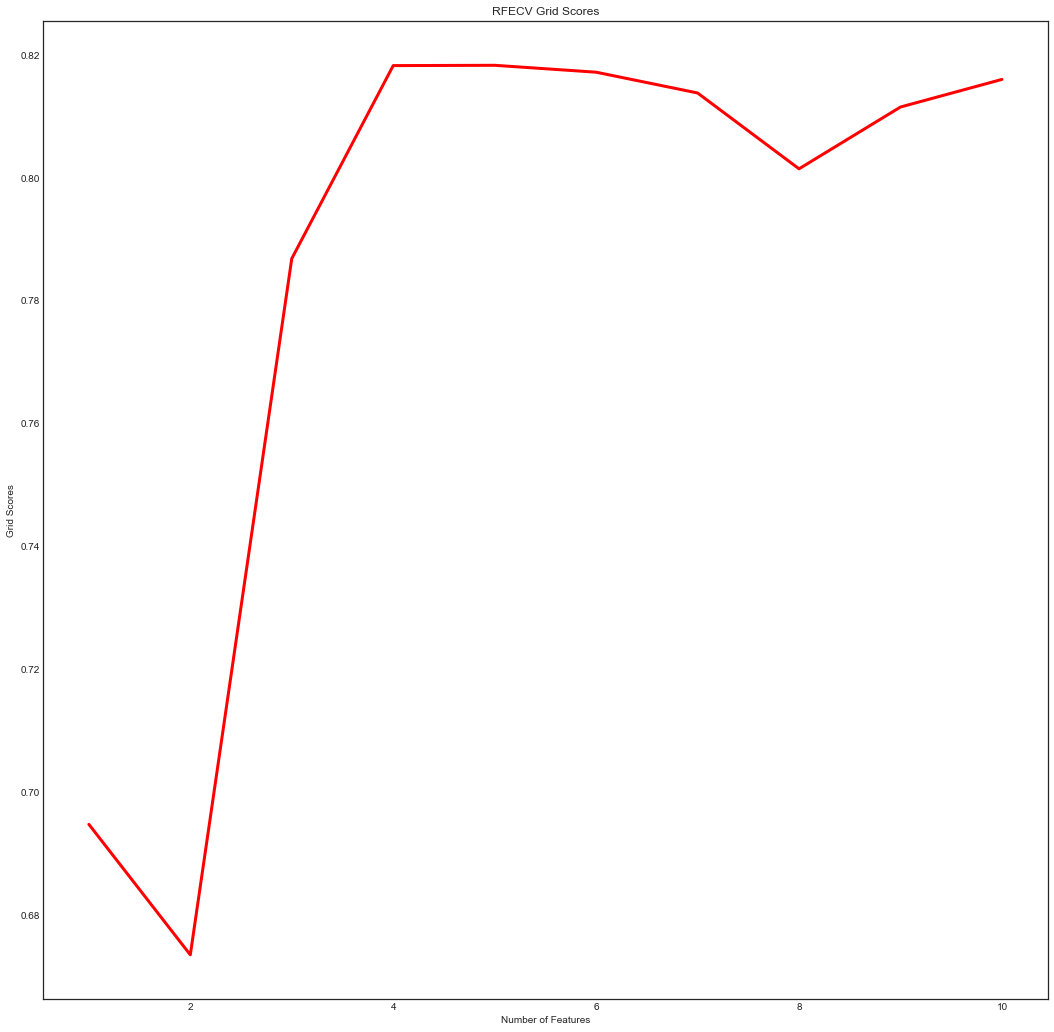

In [177]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18
                    
                   ))
plt.plot(range(1, len(rfecv.grid_scores_) + 1), np.mean(rfecv.grid_scores_, axis=1), color='red', linewidth=3)
plt.xlabel('Number of Features')
plt.ylabel('Grid Scores')
plt.title('RFECV Grid Scores')
plt.show()


In [173]:
len(rfecv.grid_scores_)

10

Identify Features

In [181]:
print(np.where(rfecv.support_ == False)[0])

[4 6 7 8 9]


In [182]:
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis =1 ,inplace=True)

In [183]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare'], dtype='object')

In [184]:
rfecv.support_

array([ True,  True,  True,  True, False,  True, False, False, False,
       False])

In [185]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare'], dtype='object')

Feature inportance

In [186]:
rfecv.estimator_.feature_importances_

array([0.09739898, 0.27061573, 0.28372694, 0.04705037, 0.30120799])

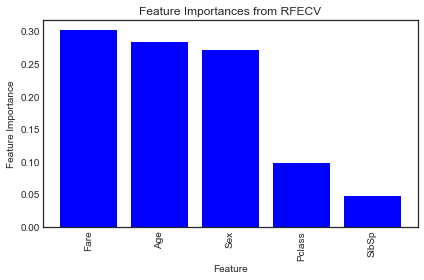

In [188]:
import matplotlib.pyplot as plt

# Get the feature importances from the RFECV estimator
feature_importances = rfecv.estimator_.feature_importances_

# Get the feature names from the original dataset
feature_names = X.columns

# Sort the feature importances and feature names together
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a bar chart of feature importances
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, color='blue')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances from RFECV')
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation='vertical')
plt.tight_layout()
plt.show()


In [189]:
X

,Pclass,Sex,Age,SibSp,Fare
0,3,0,22.000000,1,7.2500
1,1,1,38.000000,1,71.2833
2,3,1,26.000000,0,7.9250
3,1,1,35.000000,1,53.1000
4,3,0,35.000000,0,8.0500
...,...,...,...,...,...
886,2,0,27.000000,0,13.0000
887,1,1,19.000000,0,30.0000
888,3,1,29.699118,1,23.4500
889,1,0,26.000000,0,30.0000


In [190]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, target)

# Predict the target variable
predictions = model.predict(X)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Calculate the mean squared error
mse = np.mean((predictions - target) ** 2)
print('Mean Squared Error:', mse)


Coefficients: [-1.71784421e-01  5.06346645e-01 -5.78314495e-03 -4.83266672e-02
  3.53074754e-04]
Intercept: 0.7876429937472114
Mean Squared Error: 0.14329899199223398


In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the test set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Print accuracy
print('Accuracy:', accuracy)

# Print confusion matrix and classification report
confusion = confusion_matrix(y_test, predictions)
classification = classification_report(y_test, predictions)

print('Confusion Matrix:')
print(confusion)

print('Classification Report:')
print(classification)


Accuracy: 0.7932960893854749
Confusion Matrix:
[[89 16]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

